In [121]:
import graph_tool as gt
import graph_tool.draw as gtd
import numpy as np
from graph_tool import spectral
from graph_tool import generation
import networkx as nx
import matplotlib.pyplot as plt

In [86]:
def hist(array : np.ndarray):
    """
    given array of integer values,
    returns the histogram of consecutive integer values without hole
    """
    bins = np.append(np.arange(0,array.max()+1)-0.5,array.max()+0.5)
    return np.histogram(array, bins = bins)[0]

def d(e : gt.Edge):
    """given an edge, returns the manhattan distance of their respective vertex property vector"""
    v = e.source()
    u = e.target()
    x = v_deg_prop_map[int(u)]
    y = v_deg_prop_map[int(v)]
    distance = np.sum(np.abs(x-y))
    return distance

edge property map is  [1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1]


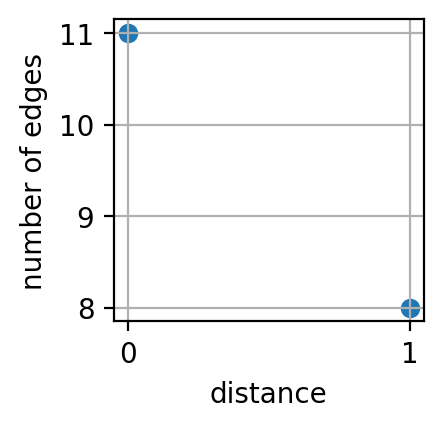

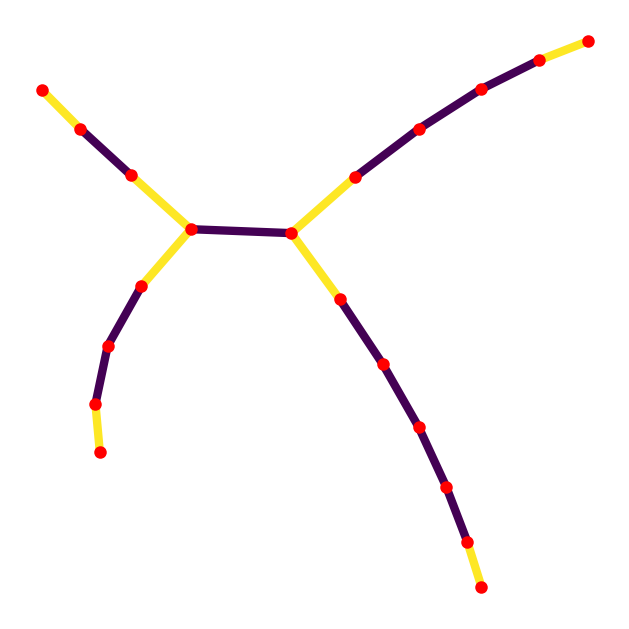

In [139]:
output = "/Users/endingalaporte/Desktop"
G = gt.Graph(directed = False)
edgelist = np.array([[0,1],[1,2],[2,3],[3,4],
                     [4,5],[5,6],[6,7],[7,8],
                     [8,9],[9,10],[10,11],[5,12],
                     [12,13],[13,14],[14,15],
                     [12,16],[16,17],[17,18],
                     [18,19]])

"""
edgelist = np.array([[0,7],[0,1],[1,2],[1,6],[7,6],[6,5],
                     [2,5],[2,3],[3,4],[4,5],[4,23],[7,8],
                     [8,9],[9,6],[9,10],[10,5],[10,11],[11,4],
                    [11,12],[12,23],[8,17],[17,16],[16,9],
                    [10,15],[15,16],[11,14],[14,15],[12,13],
                    [13,14],[17,18],[18,19],[16,19],[15,20],
                    [20,19],[14,21],[20,21],[21,22],[22,13],
                    [22,24],[24,25],[25,26],[26,27],[27,28]])

"""
G.add_edge_list(edgelist)
#gtd.graph_draw(G)

#given graph, compute degree property map, edge distance and returns edge property map
v_deg_prop_map = np.array(G.degree_property_map(deg = "total").fa)

e_prop_map = []
for e in G.edges():
    e_prop_map.append(d(e))
e_prop_map = np.array(e_prop_map)
e_prop_map = e_prop_map
print("edge property map is ",e_prop_map)

#plot 
x = [str(i) for i in range(len(hist(e_prop_map)))]
plt.figure(figsize = (2,2), dpi = 200)
plt.grid()
plt.xlabel("distance")
plt.ylabel("number of edges")
plt.scatter(x, hist(e_prop_map))
plt.savefig(output + "/degree_edge_distance_histogram.svg")
#plot graph

A = spectral.adjacency(G)
A = A.toarray()
A.shape
g = nx.convert_matrix.from_numpy_matrix(A)
plt.figure(figsize = (4,4), dpi = 150)
nx.draw(g, edge_color=e_prop_map, node_color = "red", width = 4, node_size = 25)
plt.savefig(output + "/degree_edge_distance.svg")

edge property map is  [1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1]


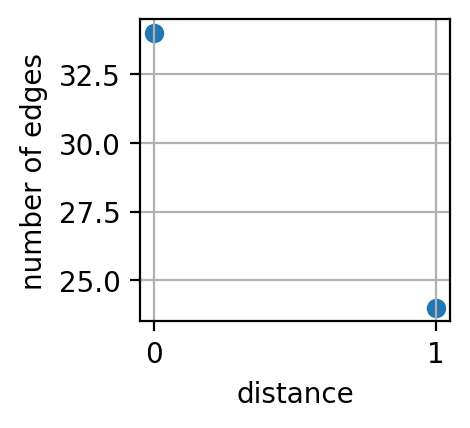

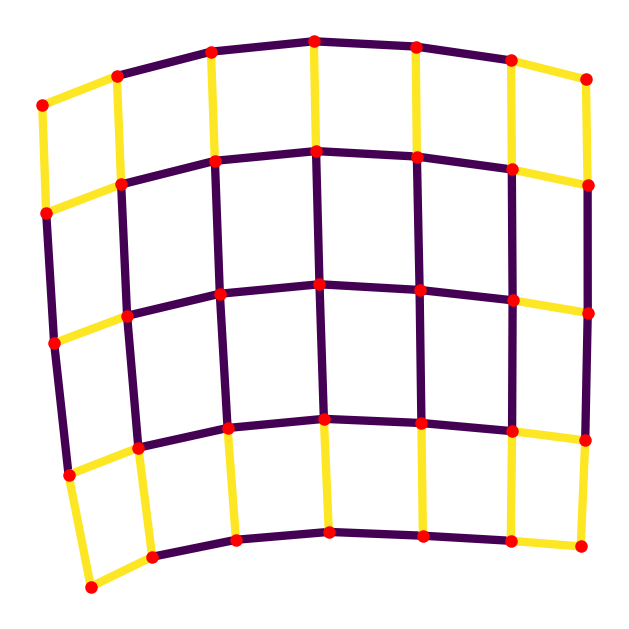

In [138]:
output = "/Users/endingalaporte/Desktop"
G = gt.Graph(directed = False)
G = generation.lattice([5,7])
#G.add_edge_list(edgelist)
#gtd.graph_draw(G)

#given graph, compute degree property map, edge distance and returns edge property map
v_deg_prop_map = np.array(G.degree_property_map(deg = "total").fa)

e_prop_map = []
for e in G.edges():
    e_prop_map.append(d(e))
e_prop_map = np.array(e_prop_map)
e_prop_map = e_prop_map
print("edge property map is ",e_prop_map)

#plot 
x = [str(i) for i in range(len(hist(e_prop_map)))]
plt.figure(figsize = (2,2), dpi = 200)
plt.grid()
plt.xlabel("distance")
plt.ylabel("number of edges")
plt.scatter(x, hist(e_prop_map))
plt.savefig(output + "/degree_edge_distance_histogram_lattice.svg")
#plot graph

A = spectral.adjacency(G)
A = A.toarray()
A.shape
g = nx.convert_matrix.from_numpy_matrix(A)
plt.figure(figsize = (4,4), dpi = 150)
nx.draw(g, edge_color=e_prop_map, node_color = "red", width = 4, node_size = 25)
plt.savefig(output + "/degree_edge_distance_lattice.svg")